# KNN & SVC Best channel search

Realizando 20 rodadas de classificação com `KNN` e `SVC` com os dois dataframes para definir com qual canal individual se obtém os melhores resultados.

O canal que será levado em conta para a busca do melhor par será o que obteve melhor pontuação média no dataframe extraído com DWT.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Carregando dataframes e gerando sementes

In [2]:
chb12_sem_dwt_df = pd.read_csv('./chb12.csv')
target_sem_dwt_s = chb12_sem_dwt_df.pop('target')
y_sem_dwt = target_sem_dwt_s.values

# agrupa todas colunas pelo mesmo número do canal
canais_sem_dwt_agrupados_por_numero = []
for i in range(18):
    canais_sem_dwt_agrupados_por_numero.append(
        [column for column in chb12_sem_dwt_df.columns if f'{i}' in column.split('-')]
    )

chb12_com_dwt_df = pd.read_csv('./chb12dwt.csv')
target_com_dwt_s = chb12_com_dwt_df.pop('target')
y_com_dwt = target_com_dwt_s.values

# agrupa todas colunas pelo mesmo número do canal
canais_com_dwt_agrupados_por_numero = []
for i in range(18):
    canais_com_dwt_agrupados_por_numero.append(
        [column for column in chb12_com_dwt_df.columns if f'{i}' in column.split('-')]
    )

seed_array = np.random.randint(0, 8000, 20)
print(f'seeds: {seed_array}')

seeds: [ 563 5530 3608 4598 6381 3397  340  860 4997 1764 5696 2029 3710 7327
 5228 4249 1761  698 4732 4459]


## 20 rodadas com `KNN` no dataframe sem DWT

In [3]:
knn_sem_dwt_df = pd.DataFrame()

for channel_number, channel_columns in enumerate(canais_sem_dwt_agrupados_por_numero):
    # X recebe apenas as colunas relacionadas ao canal respectivo à iteração
    X = chb12_sem_dwt_df[channel_columns].values
    channel_acc = []
    
    for seed in seed_array:
        # Separando dados
        X_train, X_test, y_train, y_test = train_test_split(X, y_sem_dwt, test_size=0.3, random_state=seed)

        # Instanciando classificador
        classifier = KNeighborsClassifier().fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    knn_sem_dwt_df[f'CH-{channel_number}'] = channel_acc

knn_sem_dwt_df

,CH-0,CH-1,CH-2,CH-3,CH-4,CH-5,CH-6,CH-7,CH-8,CH-9,CH-10,CH-11,CH-12,CH-13,CH-14,CH-15,CH-16,CH-17
0,0.611888,0.611888,0.587413,0.552448,0.555944,0.611888,0.527972,0.636364,0.534965,0.632867,0.618881,0.597902,0.531469,0.636364,0.587413,0.573427,0.622378,0.625874
1,0.527972,0.580420,0.590909,0.587413,0.520979,0.653846,0.527972,0.611888,0.576923,0.664336,0.678322,0.608392,0.500000,0.674825,0.573427,0.580420,0.653846,0.653846
2,0.587413,0.555944,0.611888,0.534965,0.524476,0.583916,0.534965,0.597902,0.562937,0.566434,0.622378,0.622378,0.559441,0.643357,0.566434,0.569930,0.657343,0.667832
3,0.545455,0.678322,0.611888,0.583916,0.541958,0.639860,0.531469,0.524476,0.576923,0.681818,0.618881,0.622378,0.531469,0.653846,0.566434,0.559441,0.650350,0.604895
4,0.597902,0.601399,0.587413,0.587413,0.569930,0.580420,0.496503,0.587413,0.587413,0.608392,0.650350,0.597902,0.590909,0.681818,0.555944,0.569930,0.615385,0.636364
5,0.548951,0.618881,0.559441,0.594406,0.534965,0.604895,0.524476,0.583916,0.538462,0.646853,0.625874,0.636364,0.538462,0.681818,0.601399,0.548951,0.629371,0.608392
6,0.552448,0.622378,0.573427,0.604895,0.576923,0.618881,0.520979,0.643357,0.597902,0.646853,0.594406,0.608392,0.583916,0.646853,0.622378,0.555944,0.660839,0.643357
7,0.576923,0.622378,0.608392,0.604895,0.541958,0.629371,0.513986,0.639860,0.545455,0.646853,0.611888,0.587413,0.566434,0.688811,0.583916,0.601399,0.664336,0.618881
8,0.566434,0.618881,0.643357,0.622378,0.573427,0.608392,0.506993,0.601399,0.541958,0.611888,0.562937,0.590909,0.559441,0.674825,0.534965,0.611888,0.657343,0.650350
9,0.562937,0.594406,0.611888,0.583916,0.513986,0.615385,0.503497,0.657343,0.555944,0.615385,0.653846,0.625874,0.555944,0.660839,0.594406,0.590909,0.653846,0.650350


,count,mean,std,min,25%,50%,75%,max
CH-13,20.0,0.669755,0.024969,0.632867,0.652098,0.673077,0.681818,0.723776
CH-16,20.0,0.640385,0.019950,0.611888,0.618881,0.650350,0.658217,0.664336
CH-17,20.0,0.638287,0.026397,0.601399,0.616259,0.639860,0.654720,0.685315
CH-9,20.0,0.625000,0.028471,0.566434,0.608392,0.617133,0.646853,0.681818
CH-10,20.0,0.620979,0.029020,0.562937,0.604021,0.618881,0.629371,0.678322
CH-11,20.0,0.618706,0.025098,0.580420,0.600524,0.613636,0.632867,0.674825
CH-1,20.0,0.614685,0.027940,0.555944,0.594406,0.617133,0.630245,0.678322
CH-5,20.0,0.609266,0.022798,0.573427,0.586538,0.613636,0.623252,0.653846
CH-2,20.0,0.608741,0.029427,0.559441,0.590035,0.604895,0.632867,0.678322
CH-7,20.0,0.601748,0.030857,0.524476,0.587413,0.601399,0.615385,0.657343


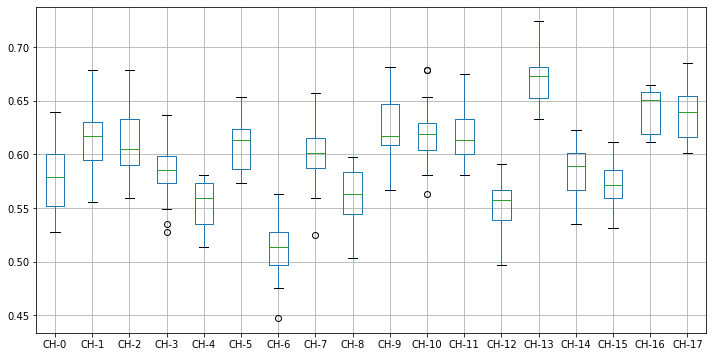

In [4]:
knn_sem_dwt_df.boxplot(figsize=(12, 6))
knn_sem_dwt_df.describe().transpose().sort_values(by='mean', ascending=False)

## 20 rodadas com `KNN` no dataframe com DWT

In [5]:
knn_com_dwt_df = pd.DataFrame()

for channel_number, channel_columns in enumerate(canais_com_dwt_agrupados_por_numero):
    # X recebe apenas as colunas relacionadas ao canal respectivo à iteração
    X = chb12_com_dwt_df[channel_columns].values
    channel_acc = []
    
    for seed in seed_array:
        # Separando dados
        X_train, X_test, y_train, y_test = train_test_split(X, y_com_dwt, test_size=0.3, random_state=seed)

        # Instanciando classificador
        classifier = KNeighborsClassifier().fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    knn_com_dwt_df[f'CH-{channel_number}'] = channel_acc

knn_com_dwt_df

,CH-0,CH-1,CH-2,CH-3,CH-4,CH-5,CH-6,CH-7,CH-8,CH-9,CH-10,CH-11,CH-12,CH-13,CH-14,CH-15,CH-16,CH-17
0,0.783217,0.821678,0.912587,0.902098,0.744755,0.877622,0.909091,0.860140,0.772727,0.874126,0.891608,0.783217,0.751748,0.895105,0.961538,0.905594,0.842657,0.842657
1,0.772727,0.779720,0.933566,0.912587,0.692308,0.863636,0.870629,0.881119,0.741259,0.905594,0.909091,0.856643,0.772727,0.905594,0.951049,0.923077,0.846154,0.863636
2,0.727273,0.793706,0.891608,0.825175,0.681818,0.846154,0.849650,0.818182,0.734266,0.870629,0.856643,0.811189,0.772727,0.905594,0.951049,0.853147,0.786713,0.835664
3,0.776224,0.786713,0.912587,0.923077,0.751748,0.870629,0.867133,0.842657,0.751748,0.898601,0.912587,0.818182,0.800699,0.926573,0.923077,0.905594,0.832168,0.797203
4,0.737762,0.776224,0.902098,0.912587,0.741259,0.804196,0.853147,0.839161,0.716783,0.863636,0.888112,0.797203,0.765734,0.853147,0.926573,0.870629,0.776224,0.811189
5,0.772727,0.811189,0.909091,0.891608,0.755245,0.835664,0.881119,0.895105,0.737762,0.902098,0.926573,0.797203,0.800699,0.912587,0.937063,0.874126,0.821678,0.832168
6,0.762238,0.818182,0.888112,0.895105,0.751748,0.839161,0.870629,0.842657,0.755245,0.881119,0.891608,0.758741,0.779720,0.874126,0.947552,0.877622,0.849650,0.790210
7,0.755245,0.818182,0.916084,0.902098,0.716783,0.821678,0.804196,0.846154,0.688811,0.874126,0.867133,0.797203,0.744755,0.891608,0.926573,0.870629,0.828671,0.779720
8,0.727273,0.779720,0.898601,0.888112,0.723776,0.874126,0.884615,0.884615,0.737762,0.888112,0.860140,0.776224,0.769231,0.884615,0.891608,0.891608,0.800699,0.807692
9,0.765734,0.832168,0.940559,0.870629,0.699301,0.853147,0.846154,0.881119,0.730769,0.877622,0.898601,0.800699,0.786713,0.891608,0.944056,0.912587,0.839161,0.821678


,count,mean,std,min,25%,50%,75%,max
CH-14,20.0,0.938112,0.015764,0.891608,0.929196,0.940559,0.947552,0.965035
CH-2,20.0,0.906469,0.018671,0.870629,0.891608,0.905594,0.917832,0.940559
CH-13,20.0,0.895629,0.018511,0.853147,0.884615,0.893357,0.907343,0.926573
CH-3,20.0,0.890734,0.021430,0.825175,0.883741,0.889860,0.902098,0.923077
CH-15,20.0,0.890734,0.017788,0.853147,0.877622,0.889860,0.905594,0.923077
CH-10,20.0,0.890210,0.019365,0.856643,0.876748,0.891608,0.903846,0.926573
CH-9,20.0,0.884790,0.016301,0.839161,0.876748,0.886364,0.895979,0.909091
CH-6,20.0,0.863287,0.025237,0.804196,0.846154,0.863636,0.873252,0.912587
CH-5,20.0,0.849650,0.019318,0.804196,0.839161,0.851399,0.864510,0.877622
CH-7,20.0,0.849650,0.024983,0.793706,0.832168,0.844406,0.867133,0.895105


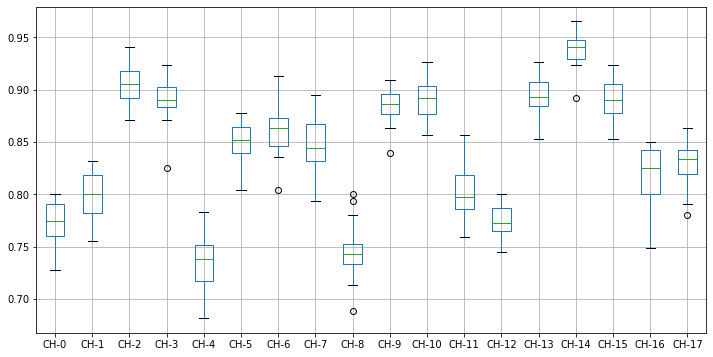

In [6]:
knn_com_dwt_df.boxplot(figsize=(12, 6))
knn_com_dwt_df.describe().transpose().sort_values(by='mean', ascending=False)

## 20 rodadas com `SVC` no dataframe **sem dwt**

In [7]:
svc_sem_dwt_df = pd.DataFrame()

for channel_number, channel_columns in enumerate(canais_sem_dwt_agrupados_por_numero):
    # X recebe apenas as colunas relacionadas ao canal respectivo à iteração
    X = chb12_sem_dwt_df[channel_columns].values
    channel_acc = []
    
    for seed in seed_array:
        # Separando dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y_sem_dwt, test_size=0.3, random_state=seed)

        # Pré-processando dados
        std_scaler = StandardScaler().fit(X_pre_train)

        X_train = std_scaler.transform(X_pre_train)
        X_test = std_scaler.transform(X_pre_test)

        # Instanciando classificador
        classifier = SVC(cache_size=500).fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    svc_sem_dwt_df[f'CH-{channel_number}'] = channel_acc

svc_sem_dwt_df

,CH-0,CH-1,CH-2,CH-3,CH-4,CH-5,CH-6,CH-7,CH-8,CH-9,CH-10,CH-11,CH-12,CH-13,CH-14,CH-15,CH-16,CH-17
0,0.706294,0.734266,0.636364,0.716783,0.709790,0.667832,0.625874,0.667832,0.741259,0.674825,0.692308,0.667832,0.660839,0.762238,0.702797,0.667832,0.699301,0.685315
1,0.678322,0.723776,0.650350,0.664336,0.723776,0.667832,0.643357,0.695804,0.748252,0.748252,0.716783,0.702797,0.688811,0.751748,0.730769,0.692308,0.678322,0.730769
2,0.706294,0.723776,0.664336,0.664336,0.713287,0.625874,0.583916,0.622378,0.737762,0.625874,0.660839,0.667832,0.636364,0.769231,0.716783,0.653846,0.713287,0.709790
3,0.734266,0.741259,0.688811,0.706294,0.769231,0.653846,0.611888,0.636364,0.779720,0.758741,0.748252,0.622378,0.695804,0.762238,0.720280,0.681818,0.692308,0.674825
4,0.688811,0.723776,0.643357,0.650350,0.727273,0.597902,0.611888,0.611888,0.720280,0.664336,0.664336,0.643357,0.678322,0.776224,0.681818,0.639860,0.674825,0.674825
5,0.734266,0.779720,0.608392,0.692308,0.727273,0.674825,0.639860,0.678322,0.772727,0.727273,0.741259,0.657343,0.667832,0.807692,0.755245,0.664336,0.681818,0.723776
6,0.744755,0.737762,0.671329,0.685315,0.709790,0.636364,0.625874,0.657343,0.737762,0.664336,0.702797,0.650350,0.720280,0.779720,0.741259,0.650350,0.692308,0.685315
7,0.709790,0.699301,0.646853,0.685315,0.685315,0.611888,0.580420,0.643357,0.709790,0.667832,0.664336,0.615385,0.667832,0.769231,0.702797,0.643357,0.688811,0.674825
8,0.706294,0.720280,0.706294,0.720280,0.692308,0.660839,0.597902,0.678322,0.709790,0.646853,0.650350,0.660839,0.695804,0.769231,0.667832,0.688811,0.702797,0.699301
9,0.727273,0.734266,0.706294,0.685315,0.741259,0.646853,0.601399,0.660839,0.748252,0.706294,0.706294,0.674825,0.674825,0.751748,0.730769,0.667832,0.702797,0.723776


,count,mean,std,min,25%,50%,75%,max
CH-13,20.0,0.774476,0.017035,0.751748,0.762238,0.769231,0.779720,0.811189
CH-8,20.0,0.744755,0.025316,0.709790,0.734266,0.741259,0.748252,0.818182
CH-1,20.0,0.732867,0.023535,0.685315,0.722902,0.732517,0.741259,0.779720
CH-4,20.0,0.720629,0.024799,0.685315,0.706294,0.715035,0.728147,0.769231
CH-14,20.0,0.713287,0.022546,0.667832,0.701923,0.715035,0.730769,0.755245
CH-0,20.0,0.712762,0.017102,0.678322,0.702797,0.708042,0.727273,0.744755
CH-17,20.0,0.698951,0.021007,0.664336,0.682692,0.697552,0.718531,0.730769
CH-10,20.0,0.697727,0.029176,0.650350,0.670455,0.697552,0.721154,0.748252
CH-16,20.0,0.692832,0.015274,0.653846,0.684441,0.694056,0.702797,0.716783
CH-9,20.0,0.688112,0.034006,0.625874,0.666958,0.681818,0.708916,0.758741


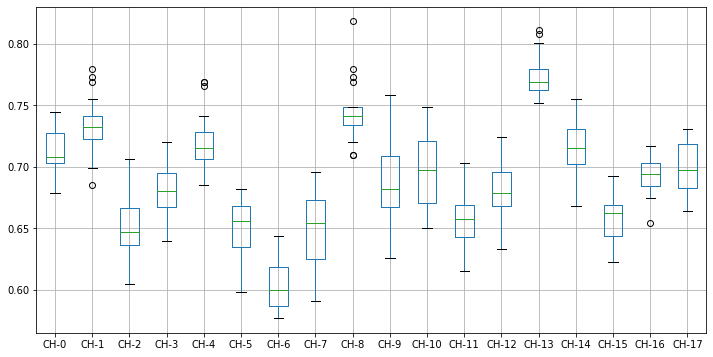

In [8]:
svc_sem_dwt_df.boxplot(figsize=(12, 6))
svc_sem_dwt_df.describe().transpose().sort_values(by='mean', ascending=False)

## 20 rodadas com `SVC` no dataframe com DWT

In [9]:
svc_com_dwt_df = pd.DataFrame()

for channel_number, channel_columns in enumerate(canais_com_dwt_agrupados_por_numero):
    # X recebe apenas as colunas relacionadas ao canal respectivo à iteração
    X = chb12_com_dwt_df[channel_columns].values
    channel_acc = []
    
    for seed in seed_array:
        # Separando dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y_com_dwt, test_size=0.3, random_state=seed)

        # Pré-processando dados
        std_scaler = StandardScaler().fit(X_pre_train)

        X_train = std_scaler.transform(X_pre_train)
        X_test = std_scaler.transform(X_pre_test)

        # Instanciando classificador
        classifier = SVC(cache_size=500).fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    svc_com_dwt_df[f'CH-{channel_number}'] = channel_acc

svc_com_dwt_df

,CH-0,CH-1,CH-2,CH-3,CH-4,CH-5,CH-6,CH-7,CH-8,CH-9,CH-10,CH-11,CH-12,CH-13,CH-14,CH-15,CH-16,CH-17
0,0.891608,0.902098,0.951049,0.972028,0.884615,0.958042,0.958042,0.944056,0.867133,0.923077,0.968531,0.933566,0.839161,0.919580,0.965035,0.933566,0.940559,0.937063
1,0.856643,0.888112,0.954545,0.954545,0.867133,0.933566,0.979021,0.968531,0.877622,0.940559,0.965035,0.951049,0.867133,0.923077,0.961538,0.951049,0.919580,0.965035
2,0.877622,0.912587,0.937063,0.923077,0.863636,0.937063,0.947552,0.933566,0.898601,0.898601,0.958042,0.919580,0.877622,0.951049,0.954545,0.916084,0.937063,0.933566
3,0.863636,0.905594,0.954545,0.944056,0.888112,0.944056,0.954545,0.944056,0.853147,0.940559,0.965035,0.951049,0.849650,0.919580,0.947552,0.958042,0.937063,0.940559
4,0.853147,0.891608,0.947552,0.947552,0.860140,0.912587,0.944056,0.947552,0.828671,0.926573,0.951049,0.923077,0.821678,0.888112,0.947552,0.944056,0.916084,0.944056
5,0.881119,0.909091,0.958042,0.961538,0.863636,0.937063,0.965035,0.951049,0.881119,0.912587,0.965035,0.937063,0.874126,0.951049,0.954545,0.940559,0.937063,0.933566
6,0.867133,0.902098,0.937063,0.951049,0.891608,0.954545,0.965035,0.933566,0.874126,0.919580,0.954545,0.930070,0.877622,0.933566,0.954545,0.940559,0.940559,0.933566
7,0.839161,0.870629,0.961538,0.930070,0.825175,0.912587,0.972028,0.944056,0.825175,0.926573,0.958042,0.940559,0.821678,0.919580,0.944056,0.947552,0.898601,0.961538
8,0.895105,0.891608,0.937063,0.954545,0.895105,0.930070,0.968531,0.951049,0.839161,0.916084,0.965035,0.933566,0.835664,0.930070,0.933566,0.940559,0.933566,0.951049
9,0.863636,0.870629,0.958042,0.923077,0.860140,0.891608,0.954545,0.926573,0.856643,0.919580,0.947552,0.916084,0.842657,0.926573,0.954545,0.940559,0.916084,0.954545


,count,mean,std,min,25%,50%,75%,max
CH-6,20.0,0.964510,0.011695,0.944056,0.957168,0.965035,0.972028,0.993007
CH-10,20.0,0.960839,0.007048,0.947552,0.954545,0.961538,0.965909,0.972028
CH-14,20.0,0.953497,0.009831,0.933566,0.947552,0.954545,0.958916,0.975524
CH-2,20.0,0.950175,0.008704,0.937063,0.946678,0.949301,0.955420,0.965035
CH-17,20.0,0.950000,0.012839,0.933566,0.937063,0.949301,0.961538,0.972028
CH-3,20.0,0.946678,0.015383,0.923077,0.935315,0.945804,0.956294,0.972028
CH-7,20.0,0.944930,0.011108,0.923077,0.939685,0.945804,0.951049,0.968531
CH-15,20.0,0.941084,0.009777,0.916084,0.936189,0.942308,0.947552,0.958042
CH-11,20.0,0.935490,0.011257,0.916084,0.928322,0.938811,0.944056,0.951049
CH-5,20.0,0.934615,0.016404,0.891608,0.928322,0.937063,0.944056,0.958042


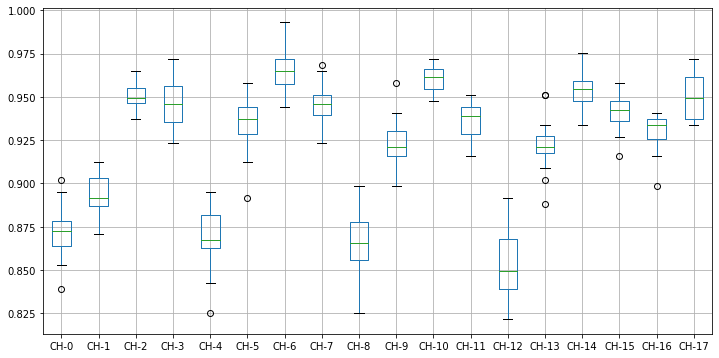

In [10]:
svc_com_dwt_df.boxplot(figsize=(12, 6))
svc_com_dwt_df.describe().transpose().sort_values(by='mean', ascending=False)